In [3]:
import argparse
import os
import torch
import torch.backends
from exp.exp_long_term_forecasting import Exp_Long_Term_Forecast
from exp.exp_imputation import Exp_Imputation
from exp.exp_short_term_forecasting import Exp_Short_Term_Forecast
from exp.exp_anomaly_detection import Exp_Anomaly_Detection
from exp.exp_classification import Exp_Classification
from utils.print_args import print_args
import random
import numpy as np
from types import SimpleNamespace
import pandas as pd
%matplotlib inline

In [ ]:
checkpoints/long_term_forecast_btc_96_96_close30_nontimef_withscale_TimesNet_custom_ftMS_sl720_ll0_pl1_dm4_nh8_el2_dl1_df4_expand2_dc4_fc3_ebtimeF_dtTrue_Exp_0

In [4]:
args = {
    "task_name": "long_term_forecast",
    "is_training": 1,
    "model_id": "close30_nontimef_withscale",
    "model": "TimesNet",
    "data": "custom",
    "root_path": "/home/lchang003/Time-Series-Library/dataset/",
    "data_path": "/home/lchang003/Time-Series-Library/dataset/btc_nopct.csv",
    "features": "MS",
    "target": "pct",
    "freq": "t",
    "checkpoints": "/home/lchang003/Time-Series-Library/checkpoints/",
    "seq_len": 720,
    "label_len": 0,
    "pred_len": 30,
    "seasonal_patterns": "Monthly",
    "inverse": False,
    "mask_rate": 0.25,
    "anomaly_ratio": 0.25,
    "expand": 2,
    "d_conv": 4,
    "top_k": 4,
    "num_kernels": 6,
    "enc_in": 15,
    "dec_in": 16,
    "c_out": 1,
    "d_model": 16,
    "n_heads": 8,
    "e_layers": 2,
    "d_layers": 1,
    "d_ff": 4,
    "moving_avg": 25,
    "factor": 3,
    "distil": True,
    "dropout": 0.1,
    "embed": "timeF",
    "activation": "gelu",
    "channel_independence": 1,
    "decomp_method": "moving_avg",
    "use_norm": 1,
    "down_sampling_layers": 0,
    "down_sampling_window": 1,
    "down_sampling_method": None,
    "seg_len": 96,
    "num_workers": 10,
    "itr": 1,
    "train_epochs": 10,
    "batch_size": 7200,
    "patience": 3,
    "learning_rate": 0.0001,
    "des": "Exp",
    "loss": "MSE",
    "lradj": "type1",
    "use_amp": False,
    "use_gpu": False,
    "gpu": 0,
    "gpu_type": "cuda",
    "use_multi_gpu": False,
    "devices": "0,1,2,3",
    "p_hidden_dims": [128, 128],
    "p_hidden_layers": 2,
    "use_dtw": False,
    "augmentation_ratio": 0,
    "seed": 2,
    "jitter": False,
    "scaling": False,
    "permutation": False,
    "randompermutation": False,
    "magwarp": False,
    "timewarp": False,
    "windowslice": False,
    "windowwarp": False,
    "rotation": False,
    "spawner": False,
    "dtwwarp": False,
    "shapedtwwarp": False,
    "wdba": False,
    "discdtw": False,
    "discsdtw": False,
    "extra_tag": "",
    "patch_len": 16,
    "device": "cpu",
}
args = SimpleNamespace(**args)
exp = Exp_Long_Term_Forecast(args)  # set experiments

Use CPU


In [9]:
test_set, test_loader = exp._get_data('test')  # get data
test_set

test 435734


In [13]:
test_set.data_y

array([[ 3.54100000e+00,  4.73600000e+00,  4.11728761e+06, ...,
         6.12699500e+04,  6.12736263e+04, -3.19793766e-04],
       [ 4.87700000e+00,  7.66700000e+00,  3.34080269e+06, ...,
         6.13350500e+04,  6.13143986e+04,  1.06414406e-03],
       [ 8.50400000e+00,  5.58400000e+00,  3.49715612e+06, ...,
         6.12930500e+04,  6.13016658e+04, -6.84762885e-04],
       ...,
       [ 1.17730000e+01,  9.88000000e+00,  3.59097764e+06, ...,
         8.67290500e+04,  8.66903797e+04,  4.77576954e-04],
       [ 1.83900000e+00,  4.52800000e+00,  1.12773996e+06, ...,
         8.67399000e+04,  8.67361879e+04,  1.25678839e-04],
       [ 2.39500000e+00,  4.75600000e+00,  8.20345942e+05, ...,
         8.67537000e+04,  8.67449554e+04,  1.60249205e-04]])

In [15]:
for i, (batch_x, batch_y, batch_x_mark, batch_y_mark) in enumerate(test_loader):
    print(batch_x.shape)
    print(batch_y.shape)
    print(batch_x_mark.shape)
    print(batch_y_mark.shape)

    break


torch.Size([9600, 96, 16])
torch.Size([9600, 10, 16])
torch.Size([9600, 96, 5])
torch.Size([9600, 10, 5])


In [16]:
batch_x_mark

tensor([[[-0.4661, -0.1522,  0.0000, -0.2333, -0.1466],
         [-0.4492, -0.1522,  0.0000, -0.2333, -0.1466],
         [-0.4322, -0.1522,  0.0000, -0.2333, -0.1466],
         ...,
         [ 0.0932, -0.1087,  0.0000, -0.2333, -0.1466],
         [ 0.1102, -0.1087,  0.0000, -0.2333, -0.1466],
         [ 0.1271, -0.1087,  0.0000, -0.2333, -0.1466]],

        [[-0.4492, -0.1522,  0.0000, -0.2333, -0.1466],
         [-0.4322, -0.1522,  0.0000, -0.2333, -0.1466],
         [-0.4153, -0.1522,  0.0000, -0.2333, -0.1466],
         ...,
         [ 0.1102, -0.1087,  0.0000, -0.2333, -0.1466],
         [ 0.1271, -0.1087,  0.0000, -0.2333, -0.1466],
         [ 0.1441, -0.1087,  0.0000, -0.2333, -0.1466]],

        [[-0.4322, -0.1522,  0.0000, -0.2333, -0.1466],
         [-0.4153, -0.1522,  0.0000, -0.2333, -0.1466],
         [-0.3983, -0.1522,  0.0000, -0.2333, -0.1466],
         ...,
         [ 0.1271, -0.1087,  0.0000, -0.2333, -0.1466],
         [ 0.1441, -0.1087,  0.0000, -0.2333, -0.1466],
  

In [19]:
enc_out = exp.model.enc_embedding(batch_x.float().to('cpu'),None)
enc_out.shape

torch.Size([9600, 96, 8])

In [22]:
exp.model.enc_embedding.value_embedding(batch_x.float().to('cpu')).shape

torch.Size([9600, 96, 8])

In [25]:
enc_out = exp.model.enc_embedding.forward(batch_x.float().to('cpu'),None)

In [28]:
enc_out_1 = exp.model.predict_linear(enc_out.permute(0, 2, 1)).permute(0, 2, 1)

In [33]:
from models.TimesNet import FFT_for_Period
FFT_for_Period(enc_out_1,4)

(array([ 9,  2, 13,  2]),
 tensor([[19873918., 12063305., 11817084., 10756670.],
         [17069580., 10875812., 10812600.,  8715790.],
         [19776814., 14891259.,  9889736.,  9996900.],
         ...,
         [32770640., 22095788., 15830253., 28999344.],
         [36082548., 21888624., 22384384., 23356820.],
         [20732938., 14727906., 25936584., 25190944.]],
        grad_fn=<IndexBackward0>))

In [36]:
#first laryer of timesnet
enc_out_2 = exp.model.model[0](enc_out_1)
enc_out_2.shape

torch.Size([9600, 106, 8])

In [37]:
enc_out_3 = exp.model.layer_norm(enc_out_2)
enc_out_3.shape

torch.Size([9600, 106, 8])

In [38]:
enc_out_4 = exp.model.projection(enc_out_3)
enc_out_4.shape

torch.Size([9600, 106, 1])

In [42]:
enc_out_4[:,-10:,-1:]

tensor([[[-0.3413],
         [-0.2669],
         [ 0.1996],
         ...,
         [-0.0241],
         [-0.3506],
         [ 0.0566]],

        [[-0.3798],
         [-0.6336],
         [ 0.1257],
         ...,
         [ 0.3805],
         [-0.2626],
         [-0.3464]],

        [[-0.4227],
         [-0.1682],
         [ 0.3023],
         ...,
         [-0.3653],
         [-0.9346],
         [-0.9464]],

        ...,

        [[ 0.1431],
         [-0.9160],
         [ 0.3319],
         ...,
         [-0.7860],
         [-0.9124],
         [-0.3662]],

        [[ 0.2538],
         [ 0.1259],
         [ 0.2928],
         ...,
         [-0.4946],
         [-0.6196],
         [-0.1226]],

        [[-0.1587],
         [-0.6593],
         [-0.0476],
         ...,
         [-0.2865],
         [-0.8555],
         [-0.8475]]], grad_fn=<SliceBackward0>)

In [44]:
batch_y[:,-10:,-1:]

tensor([[[-0.0006],
         [ 0.0008],
         [ 0.0010],
         ...,
         [ 0.0004],
         [-0.0003],
         [-0.0006]],

        [[ 0.0008],
         [ 0.0010],
         [ 0.0004],
         ...,
         [-0.0003],
         [-0.0006],
         [ 0.0015]],

        [[ 0.0010],
         [ 0.0004],
         [-0.0003],
         ...,
         [-0.0006],
         [ 0.0015],
         [-0.0007]],

        ...,

        [[-0.0004],
         [ 0.0005],
         [-0.0006],
         ...,
         [-0.0005],
         [ 0.0010],
         [-0.0002]],

        [[ 0.0005],
         [-0.0006],
         [-0.0003],
         ...,
         [ 0.0010],
         [-0.0002],
         [ 0.0003]],

        [[-0.0006],
         [-0.0003],
         [-0.0001],
         ...,
         [-0.0002],
         [ 0.0003],
         [-0.0004]]], dtype=torch.float64)

In [58]:
pred = np.load("/home/lchang003/Time-Series-Library/results/long_term_forecast_btc_96_96_nontimef_no_scale_TimesNet_custom_ftMS_sl96_ll0_pl1_dm8_nh8_el2_dl1_df8_expand2_dc4_fc3_ebtimeF_dtTrue_Exp_0/pred.npy", allow_pickle=True)
true = np.load("/home/lchang003/Time-Series-Library/results/long_term_forecast_btc_96_96_nontimef_no_scale_TimesNet_custom_ftMS_sl96_ll0_pl1_dm8_nh8_el2_dl1_df8_expand2_dc4_fc3_ebtimeF_dtTrue_Exp_0/true.npy", allow_pickle=True)

In [59]:
import pandas as pd


In [62]:
np.corrcoef(pred.flatten(), true.flatten())

array([[1.        , 0.00147291],
       [0.00147291, 1.        ]])

<Axes: >

In [42]:
import matplotlib.pyplot as plt
pd.Series(y_true).plot()
plt.show()

# checkpoint load

In [6]:
loaded = torch.load('/home/lchang003/Time-Series-Library/checkpoints/long_term_forecast_btc_96_96_close30_nontimef_withscale_TimesNet_custom_ftMS_sl720_ll0_pl1_dm4_nh8_el2_dl1_df4_expand2_dc4_fc3_ebtimeF_dtTrue_Exp_0/checkpoint.pth')

In [7]:
loaded.keys()

odict_keys(['model.0.conv.0.kernels.0.weight', 'model.0.conv.0.kernels.0.bias', 'model.0.conv.0.kernels.1.weight', 'model.0.conv.0.kernels.1.bias', 'model.0.conv.0.kernels.2.weight', 'model.0.conv.0.kernels.2.bias', 'model.0.conv.0.kernels.3.weight', 'model.0.conv.0.kernels.3.bias', 'model.0.conv.0.kernels.4.weight', 'model.0.conv.0.kernels.4.bias', 'model.0.conv.0.kernels.5.weight', 'model.0.conv.0.kernels.5.bias', 'model.0.conv.2.kernels.0.weight', 'model.0.conv.2.kernels.0.bias', 'model.0.conv.2.kernels.1.weight', 'model.0.conv.2.kernels.1.bias', 'model.0.conv.2.kernels.2.weight', 'model.0.conv.2.kernels.2.bias', 'model.0.conv.2.kernels.3.weight', 'model.0.conv.2.kernels.3.bias', 'model.0.conv.2.kernels.4.weight', 'model.0.conv.2.kernels.4.bias', 'model.0.conv.2.kernels.5.weight', 'model.0.conv.2.kernels.5.bias', 'model.1.conv.0.kernels.0.weight', 'model.1.conv.0.kernels.0.bias', 'model.1.conv.0.kernels.1.weight', 'model.1.conv.0.kernels.1.bias', 'model.1.conv.0.kernels.2.weight', '

In [8]:
exp = Exp_Long_Term_Forecast(args)  # Replace with your model class and arguments
exp.model.load_state_dict(torch.load('/home/lchang003/Time-Series-Library/checkpoints/long_term_forecast_btc_96_96_close30_nontimef_withscale_TimesNet_custom_ftMS_sl720_ll0_pl1_dm4_nh8_el2_dl1_df4_expand2_dc4_fc3_ebtimeF_dtTrue_Exp_0/checkpoint.pth'))
exp.model.eval()  # Set the model to evaluation mode

Use CPU


RuntimeError: Error(s) in loading state_dict for Model:
	size mismatch for model.0.conv.0.kernels.0.weight: copying a param with shape torch.Size([4, 4, 1, 1]) from checkpoint, the shape in current model is torch.Size([4, 16, 1, 1]).
	size mismatch for model.0.conv.0.kernels.1.weight: copying a param with shape torch.Size([4, 4, 3, 3]) from checkpoint, the shape in current model is torch.Size([4, 16, 3, 3]).
	size mismatch for model.0.conv.0.kernels.2.weight: copying a param with shape torch.Size([4, 4, 5, 5]) from checkpoint, the shape in current model is torch.Size([4, 16, 5, 5]).
	size mismatch for model.0.conv.0.kernels.3.weight: copying a param with shape torch.Size([4, 4, 7, 7]) from checkpoint, the shape in current model is torch.Size([4, 16, 7, 7]).
	size mismatch for model.0.conv.0.kernels.4.weight: copying a param with shape torch.Size([4, 4, 9, 9]) from checkpoint, the shape in current model is torch.Size([4, 16, 9, 9]).
	size mismatch for model.0.conv.0.kernels.5.weight: copying a param with shape torch.Size([4, 4, 11, 11]) from checkpoint, the shape in current model is torch.Size([4, 16, 11, 11]).
	size mismatch for model.0.conv.2.kernels.0.weight: copying a param with shape torch.Size([4, 4, 1, 1]) from checkpoint, the shape in current model is torch.Size([16, 4, 1, 1]).
	size mismatch for model.0.conv.2.kernels.0.bias: copying a param with shape torch.Size([4]) from checkpoint, the shape in current model is torch.Size([16]).
	size mismatch for model.0.conv.2.kernels.1.weight: copying a param with shape torch.Size([4, 4, 3, 3]) from checkpoint, the shape in current model is torch.Size([16, 4, 3, 3]).
	size mismatch for model.0.conv.2.kernels.1.bias: copying a param with shape torch.Size([4]) from checkpoint, the shape in current model is torch.Size([16]).
	size mismatch for model.0.conv.2.kernels.2.weight: copying a param with shape torch.Size([4, 4, 5, 5]) from checkpoint, the shape in current model is torch.Size([16, 4, 5, 5]).
	size mismatch for model.0.conv.2.kernels.2.bias: copying a param with shape torch.Size([4]) from checkpoint, the shape in current model is torch.Size([16]).
	size mismatch for model.0.conv.2.kernels.3.weight: copying a param with shape torch.Size([4, 4, 7, 7]) from checkpoint, the shape in current model is torch.Size([16, 4, 7, 7]).
	size mismatch for model.0.conv.2.kernels.3.bias: copying a param with shape torch.Size([4]) from checkpoint, the shape in current model is torch.Size([16]).
	size mismatch for model.0.conv.2.kernels.4.weight: copying a param with shape torch.Size([4, 4, 9, 9]) from checkpoint, the shape in current model is torch.Size([16, 4, 9, 9]).
	size mismatch for model.0.conv.2.kernels.4.bias: copying a param with shape torch.Size([4]) from checkpoint, the shape in current model is torch.Size([16]).
	size mismatch for model.0.conv.2.kernels.5.weight: copying a param with shape torch.Size([4, 4, 11, 11]) from checkpoint, the shape in current model is torch.Size([16, 4, 11, 11]).
	size mismatch for model.0.conv.2.kernels.5.bias: copying a param with shape torch.Size([4]) from checkpoint, the shape in current model is torch.Size([16]).
	size mismatch for model.1.conv.0.kernels.0.weight: copying a param with shape torch.Size([4, 4, 1, 1]) from checkpoint, the shape in current model is torch.Size([4, 16, 1, 1]).
	size mismatch for model.1.conv.0.kernels.1.weight: copying a param with shape torch.Size([4, 4, 3, 3]) from checkpoint, the shape in current model is torch.Size([4, 16, 3, 3]).
	size mismatch for model.1.conv.0.kernels.2.weight: copying a param with shape torch.Size([4, 4, 5, 5]) from checkpoint, the shape in current model is torch.Size([4, 16, 5, 5]).
	size mismatch for model.1.conv.0.kernels.3.weight: copying a param with shape torch.Size([4, 4, 7, 7]) from checkpoint, the shape in current model is torch.Size([4, 16, 7, 7]).
	size mismatch for model.1.conv.0.kernels.4.weight: copying a param with shape torch.Size([4, 4, 9, 9]) from checkpoint, the shape in current model is torch.Size([4, 16, 9, 9]).
	size mismatch for model.1.conv.0.kernels.5.weight: copying a param with shape torch.Size([4, 4, 11, 11]) from checkpoint, the shape in current model is torch.Size([4, 16, 11, 11]).
	size mismatch for model.1.conv.2.kernels.0.weight: copying a param with shape torch.Size([4, 4, 1, 1]) from checkpoint, the shape in current model is torch.Size([16, 4, 1, 1]).
	size mismatch for model.1.conv.2.kernels.0.bias: copying a param with shape torch.Size([4]) from checkpoint, the shape in current model is torch.Size([16]).
	size mismatch for model.1.conv.2.kernels.1.weight: copying a param with shape torch.Size([4, 4, 3, 3]) from checkpoint, the shape in current model is torch.Size([16, 4, 3, 3]).
	size mismatch for model.1.conv.2.kernels.1.bias: copying a param with shape torch.Size([4]) from checkpoint, the shape in current model is torch.Size([16]).
	size mismatch for model.1.conv.2.kernels.2.weight: copying a param with shape torch.Size([4, 4, 5, 5]) from checkpoint, the shape in current model is torch.Size([16, 4, 5, 5]).
	size mismatch for model.1.conv.2.kernels.2.bias: copying a param with shape torch.Size([4]) from checkpoint, the shape in current model is torch.Size([16]).
	size mismatch for model.1.conv.2.kernels.3.weight: copying a param with shape torch.Size([4, 4, 7, 7]) from checkpoint, the shape in current model is torch.Size([16, 4, 7, 7]).
	size mismatch for model.1.conv.2.kernels.3.bias: copying a param with shape torch.Size([4]) from checkpoint, the shape in current model is torch.Size([16]).
	size mismatch for model.1.conv.2.kernels.4.weight: copying a param with shape torch.Size([4, 4, 9, 9]) from checkpoint, the shape in current model is torch.Size([16, 4, 9, 9]).
	size mismatch for model.1.conv.2.kernels.4.bias: copying a param with shape torch.Size([4]) from checkpoint, the shape in current model is torch.Size([16]).
	size mismatch for model.1.conv.2.kernels.5.weight: copying a param with shape torch.Size([4, 4, 11, 11]) from checkpoint, the shape in current model is torch.Size([16, 4, 11, 11]).
	size mismatch for model.1.conv.2.kernels.5.bias: copying a param with shape torch.Size([4]) from checkpoint, the shape in current model is torch.Size([16]).
	size mismatch for enc_embedding.value_embedding.tokenConv.weight: copying a param with shape torch.Size([4, 16, 3]) from checkpoint, the shape in current model is torch.Size([16, 15, 3]).
	size mismatch for enc_embedding.position_embedding.pe: copying a param with shape torch.Size([1, 5000, 4]) from checkpoint, the shape in current model is torch.Size([1, 5000, 16]).
	size mismatch for enc_embedding.temporal_embedding.embed.weight: copying a param with shape torch.Size([4, 5]) from checkpoint, the shape in current model is torch.Size([16, 5]).
	size mismatch for layer_norm.weight: copying a param with shape torch.Size([4]) from checkpoint, the shape in current model is torch.Size([16]).
	size mismatch for layer_norm.bias: copying a param with shape torch.Size([4]) from checkpoint, the shape in current model is torch.Size([16]).
	size mismatch for predict_linear.weight: copying a param with shape torch.Size([721, 720]) from checkpoint, the shape in current model is torch.Size([750, 720]).
	size mismatch for predict_linear.bias: copying a param with shape torch.Size([721]) from checkpoint, the shape in current model is torch.Size([750]).
	size mismatch for projection.weight: copying a param with shape torch.Size([1, 4]) from checkpoint, the shape in current model is torch.Size([1, 16]).

In [ ]:
test_set, test_loader = exp._get_data('test')  # get data
test_set

test 435743


In [ ]:
test_set.data_y.shape

(436463, 16)

In [ ]:
i, (batch_x, batch_y, batch_x_mark, batch_y_mark)  =  next(enumerate(test_loader))
test_outputs = exp.model(batch_x.float().to('cpu'), None, None, None)
test_outputs

tensor([[[-0.7425, -0.8259, -0.7365,  ...,  2.0942,  2.0942, -0.5220]],

        [[-0.8459, -0.9448, -0.8663,  ...,  2.0911,  2.0910, -0.6297]],

        [[-0.7646, -0.8597, -0.7615,  ...,  2.0934,  2.0933, -0.5432]],

        ...,

        [[-0.0489, -0.0708,  0.1813,  ...,  2.1980,  2.1980,  0.0994]],

        [[ 0.0111, -0.0152,  0.2627,  ...,  2.2004,  2.2004,  0.1446]],

        [[-0.1987, -0.2047, -0.0136,  ...,  2.1916,  2.1916, -0.0100]]],
       grad_fn=<SliceBackward0>)

In [ ]:
batch_x.shape

torch.Size([7200, 720, 16])

In [ ]:
batch_y.shape

torch.Size([7200, 1, 16])

In [ ]:
test_outputs.shape

torch.Size([7200, 1, 16])

: 

In [ ]:
test_set.scale

True

In [ ]:
import torch.nn as nn
nn.MSELoss()(test_outputs[:,0,-1], batch_y[:,0,-1].float().to('cpu'))

tensor(0.4665, grad_fn=<MseLossBackward0>)

In [ ]:
for i in range(16):
    test_pred = test_outputs[:,0,i].detach().numpy()    #（7200，1，16）
    y_true = batch_y[:,0,i].detach().numpy()
    corr = pd.Series(test_pred).corr(pd.Series(y_true))
    print(f"{i}: {corr}")

0: -0.00940483881347998
1: 0.04356713283477644
2: -0.08867641036866934
3: -0.029614278456186326
4: -0.031801290200486526
5: -0.0895681875667284
6: -0.05764144562838003
7: 0.02630679835599525
8: 0.04570453435920458
9: 0.6964708485010273
10: 0.6992894034764691
11: 0.6935460161187915
12: 0.6963371185653536
13: 0.6964630760997083
14: 0.6966244246646524
15: -0.00035887743664914844


In [ ]:
import pandas as pd


-0.00940483881347998

In [ ]:
test_pred.min()

-1.2513245

In [ ]:
y_true.min()

-4.838954304684315

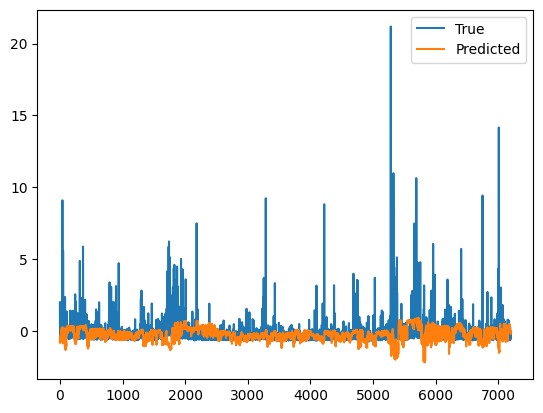

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.close()
plt.plot(y_true.flatten(), label='True')
plt.plot(test_pred.flatten(), label='Predicted')
plt.legend()
plt.show()

In [ ]:
test_pred = test_outputs[:,0,14].detach().numpy()    #（7200，1，16）
y_true = batch_y[:,0,14].detach().numpy()
corr = pd.Series(test_pred).corr(pd.Series(y_true))
corr

0.6966244246646524

<Axes: >

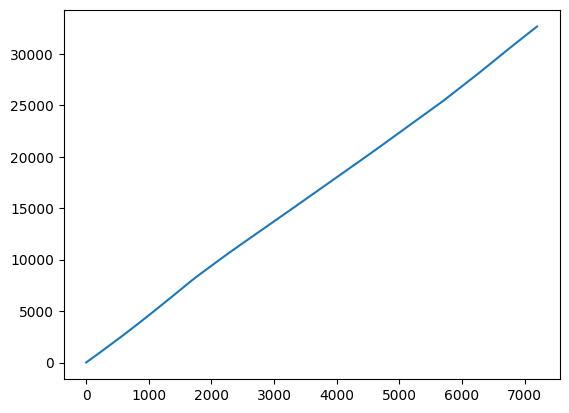

In [ ]:
(pd.Series(test_pred) * pd.Series(y_true)).cumsum().plot()